<a href="https://colab.research.google.com/github/isnanramalia/dicoding-latihanDataMining/blob/main/machine_learning/sample_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Latihan Kelas Dicoding: Machine Learning Pemula

# Preprocessing

## Latihan

In [ ]:
import os
os.listdir('sample_data')

['anscombe.json',
 'README.md',
 'california_housing_train.csv',
 'california_housing_test.csv',
 'mnist_test.csv',
 'mnist_train_small.csv']

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Preprocessing Data: Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

Contoh dari normalization adalah ketika kita memiliki dataset seperti di atas yang memiliki fitur umur dengan skala 23 sampai 45 tahun dan fitur penghasilan dengan skala 4.000.000 sampai 35.000.000. Di sini kita melihat bahwa fitur penghasilan sekitar satu juta kali lebih besar dari fitur umur dan menunjukkan kedua fitur ini berada pada skala yang sangat jauh berbeda.

Ketika membangun model seperti regresi linear, fitur penghasilan akan sangat mempengaruhi prediksi dari model karena nilainya yang jauh lebih besar daripada umur, walaupun tidak berarti fitur tersebut jauh lebih penting dari fitur umur.

Salah satu contoh dari normalization adalah min-max scaling di mana nilai-nilai dipetakan ke dalam skala 0 sampai 1. SKLearn menyediakan library untuk normalization

Pada Colab kita Import library MinMaxScaler dan masukkan data dari tabel sebelumnya.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [ ]:
print(scaler.transform(data))

[[0.25806452 0.45454545]
 [1.         1.        ]
 [0.         0.        ]
 [0.08064516 0.13636364]
 [0.16129032 0.27272727]]


## Preprocessing Data: Standardization

Standardization adalah proses konversi nilai-nilai dari suatu fitur sehingga nilai-nilai tersebut memiliki skala yang sama. Z score adalah metode paling populer untuk standardisasi di mana setiap nilai pada sebuah atribut numerik akan dikurangi dengan rata-rata dan dibagi dengan standar deviasi dari seluruh nilai pada sebuah kolom atribut.

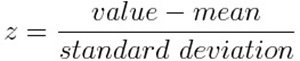

Fungsi standardisasi itu serupa dengan normalization. Keduanya berfungsi menyamakan skala nilai dari tiap atribut pada data. SKLearn menyediakan library untuk mengaplikasikan standard scaler pada data.

In [ ]:
from sklearn import preprocessing
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

In [ ]:
scaler = preprocessing.StandardScaler().fit(data)
# utk menghitung rata2 deviasi standar dr setiap kolom atribut utk kemudian diapakai pada fungsi transform

In [ ]:
data = scaler.transform(data)
data

array([[-0.11638732,  0.23521877],
       [ 1.94277296,  1.80334389],
       [-0.83261698, -1.07155217],
       [-0.60879521, -0.67952089],
       [-0.38497344, -0.28748961]])

# Split Data

## latihan 1

In [ ]:
from sklearn.model_selection import train_test_split

X_data = range(10)
y_data = range(10)

print("random_state ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)
    print(y_test)


print("random_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = None)
    print(y_test)

random_state ditentukan
[8, 1, 5]
[8, 1, 5]
[8, 1, 5]
random_state tidak ditentukan
[6, 4, 0]
[6, 0, 4]
[2, 1, 7]


## latihan 2

In [ ]:
import sklearn
from sklearn import datasets

In [ ]:
# load iris dataset
iris = datasets.load_iris()

In [ ]:
# pisahkan atribut dan label pd iris dataset
x = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split

# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# menghitung panjang/jumlah data pada x_test
len(x_test)

30

# Cross Validation Split

## 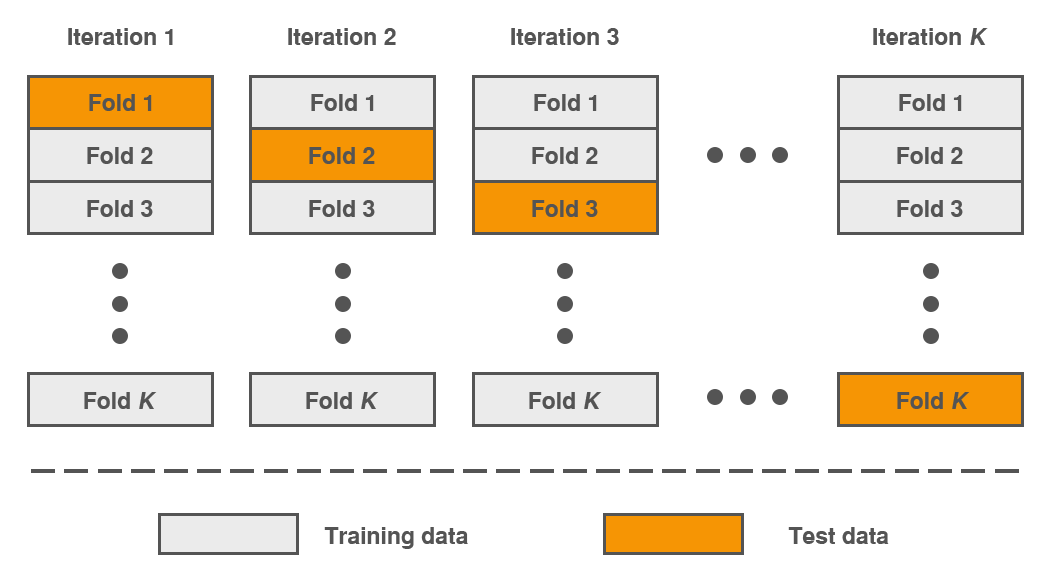

In [ ]:
import sklearn
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()

In [ ]:
# mendefinisikan atribut dan label pada dataset
x=iris.data
y=iris.target

In [ ]:
from sklearn import tree

# membuat model dengan decision tree classifier
clf = tree.DecisionTreeClassifier()

Setelah dataset dan model siap, kita bisa menggunakan cross validation untuk mengevaluasi performa dari model machine learning. Fungsi cross_val_score() seperti di bawah menerima 4 parameter yaitu, ‘clf’ yang merupakan model machine learning, ‘X’ yang merupakan atribut dari dataset, ‘y’ yang merupakan label dari dataset, dan ‘cv’ yang merupakan jumlah fold yang akan dipakai pada cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score

# mengevaluasi performa model dengan cross_val_score
scores = cross_val_score(clf, x, y, cv=5)